# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

In [14]:
# Print the city count to confirm sufficient count
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
appid = weather_api_key

In [8]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"

counter = 1
city_data = []

for city in cities:
    params = {
      "q" : city,
      "units" : "imperial",
      "appid" : weather_api_key
       }
    try:
        weather = requests.get(base_url, params=params).json()
        lat = weather["coord"]["lat"]
        lon = weather["coord"]["lon"]
        temp = weather["main"]["temp_max"]
        humid = weather["main"]["humidity"]
        cloud = weather["clouds"]["all"]
        wind = weather["wind"]["speed"]
        country = weather["sys"]["country"]
        date = datetime.fromtimestamp(weather["dt"]).date()

        city_data.append({"City" : city
                        ,"Latitude" : lat
                        ,"Longitude" : lon
                        ,"Max Temperature": temp
                        ,"Humidity": humid
                        ,"Cloudiness": cloud
                        ,"Wind Speed" : wind
                        ,"Country" : country
                        ,"Date" : date})

        print(f"Processing Record {counter} - {city}")
        counter = counter + 1
    except:
        print("City not found. Skipping")


Processing Record 1 - mar del plata
City not found. Skipping
City not found. Skipping
Processing Record 2 - pochutla
Processing Record 3 - labuan
Processing Record 4 - butaritari
Processing Record 5 - puerto ayora
Processing Record 6 - albany
Processing Record 7 - jumla
Processing Record 8 - mataura
Processing Record 9 - rikitea
Processing Record 10 - deputatskiy
Processing Record 11 - kichera
Processing Record 12 - ushuaia
Processing Record 13 - nome
Processing Record 14 - port elizabeth
Processing Record 15 - vestmannaeyjar
Processing Record 16 - sao filipe
Processing Record 17 - eregli
Processing Record 18 - cape town
Processing Record 19 - airai
Processing Record 20 - sabang
Processing Record 21 - atuona
Processing Record 22 - chokurdakh
Processing Record 23 - port alfred
Processing Record 24 - port blair
Processing Record 25 - kapaa
Processing Record 26 - farnham
Processing Record 27 - sola
Processing Record 28 - mao
Processing Record 29 - bluff
Processing Record 30 - punta arenas

Processing Record 236 - lotofaga
Processing Record 237 - yulara
Processing Record 238 - laives
City not found. Skipping
Processing Record 239 - kortkeros
Processing Record 240 - nakhon phanom
Processing Record 241 - college
Processing Record 242 - nishihara
City not found. Skipping
Processing Record 243 - souillac
Processing Record 244 - sinnamary
Processing Record 245 - bonavista
Processing Record 246 - ferme-neuve
Processing Record 247 - pevek
Processing Record 248 - vicuna
Processing Record 249 - ribeira grande
Processing Record 250 - lasa
Processing Record 251 - morondava
Processing Record 252 - gonaives
Processing Record 253 - buriti dos lopes
Processing Record 254 - hare bay
Processing Record 255 - ulaanbaatar
Processing Record 256 - longyearbyen
Processing Record 257 - strezhevoy
City not found. Skipping
Processing Record 258 - teknaf
Processing Record 259 - kandrian
Processing Record 260 - humberto de campos
Processing Record 261 - itarema
City not found. Skipping
Processing Re

Processing Record 470 - mandalgovi
City not found. Skipping
City not found. Skipping
Processing Record 471 - hailun
Processing Record 472 - srednekolymsk
Processing Record 473 - novoseleznevo
Processing Record 474 - bonaventure
Processing Record 475 - aripuana
Processing Record 476 - mendoza
Processing Record 477 - portland
Processing Record 478 - juegang
City not found. Skipping
Processing Record 479 - dombarovskiy
City not found. Skipping
Processing Record 480 - te anau
Processing Record 481 - san jeronimo
Processing Record 482 - vikulovo
Processing Record 483 - waingapu
Processing Record 484 - fonte boa
Processing Record 485 - ust-ishim
Processing Record 486 - victoria
City not found. Skipping
Processing Record 487 - grand gaube
Processing Record 488 - bodden town
Processing Record 489 - dalvik
Processing Record 490 - quito
Processing Record 491 - chicama
Processing Record 492 - matata
Processing Record 493 - cacu
Processing Record 494 - nancha
Processing Record 495 - chumikan
Proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
city_data_df = pd.DataFrame(city_data)
city_data_df

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,55.99,81,2,6.93,AR,2020-05-10
1,pochutla,15.74,-96.47,84.00,79,4,1.79,MX,2020-05-10
2,labuan,5.28,115.24,91.40,70,75,3.36,MY,2020-05-10
3,butaritari,3.07,172.79,83.80,76,16,6.96,KI,2020-05-10
4,puerto ayora,-0.74,-90.35,75.99,94,0,3.00,EC,2020-05-10
...,...,...,...,...,...,...,...,...,...
539,varkkallai,8.73,76.71,86.00,79,75,3.36,IN,2020-05-10
540,sambava,-14.27,50.17,75.52,81,94,14.12,MG,2020-05-10
541,zapolyarnyy,69.42,30.81,32.00,97,90,10.29,RU,2020-05-10
542,pandan,14.05,124.17,87.64,66,71,5.97,PH,2020-05-10


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [12]:
#  Get the indices of cities that have humidity over 100%.
city_index = city_data_df[city_data_df["Humidity"]>100].index
len(city_index)

0

In [14]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_data_df.drop(city_index)
clean_city_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,55.99,81,2,6.93,AR,2020-05-10
1,pochutla,15.74,-96.47,84.00,79,4,1.79,MX,2020-05-10
2,labuan,5.28,115.24,91.40,70,75,3.36,MY,2020-05-10
3,butaritari,3.07,172.79,83.80,76,16,6.96,KI,2020-05-10
4,puerto ayora,-0.74,-90.35,75.99,94,0,3.00,EC,2020-05-10
...,...,...,...,...,...,...,...,...,...
539,varkkallai,8.73,76.71,86.00,79,75,3.36,IN,2020-05-10
540,sambava,-14.27,50.17,75.52,81,94,14.12,MG,2020-05-10
541,zapolyarnyy,69.42,30.81,32.00,97,90,10.29,RU,2020-05-10
542,pandan,14.05,124.17,87.64,66,71,5.97,PH,2020-05-10


In [54]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
clean_city_data.to_csv("../output_data/cities.csv", encoding="utf-8", index=False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [17]:
max_date=clean_city_data["Date"].max()

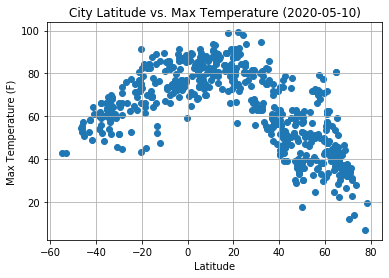

In [18]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Max Temperature"])
ax.set_title(f"City Latitude vs. Max Temperature ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.grid()

In [ ]:
# The plot above shows that the closer you are to 20degrees latitude the higher the max temperatures.
# As you move toward the poles the temperature lowers.
# In this plot, it shows that the north pole is colder than the south pole.

## Latitude vs. Humidity Plot

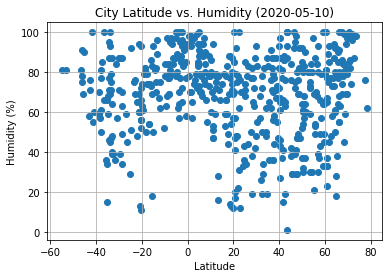

In [20]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Humidity"])
ax.set_title(f"City Latitude vs. Humidity ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Humidity (%)")
ax.grid()

In [ ]:
# The plot above shows most cities have a humidity between 60 and 100.
# The humidity at the equator doesn't seem to fall below 50%.

## Latitude vs. Cloudiness Plot

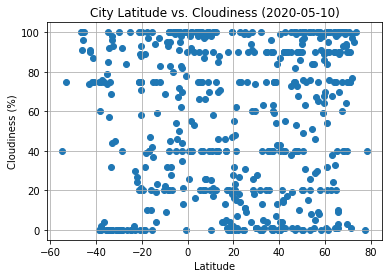

In [21]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Cloudiness"])
ax.set_title(f"City Latitude vs. Cloudiness ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Cloudiness (%)")
ax.grid()

In [ ]:
# The plot above doesn't seem to show any correlation between Latitude and Cloudiness

## Latitude vs. Wind Speed Plot

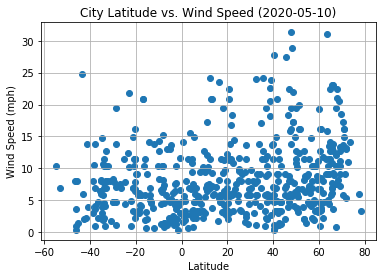

In [22]:
fig, ax = plt.subplots()
ax.scatter(clean_city_data["Latitude"],clean_city_data["Wind Speed"])
ax.set_title(f"City Latitude vs. Wind Speed ({max_date})")
ax.set_xlabel("Latitude")
ax.set_ylabel("Wind Speed (mph)")
ax.grid()

In [ ]:
# The plot above shows that the wind speed in most cities stay between zero and 15 mph without regard to latitude.

## Linear Regression

In [23]:
# Create Northern and Southern Hemisphere DataFrames
north=clean_city_data[clean_city_data["Latitude"]>0]
north

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
1,pochutla,15.74,-96.47,84.00,79,4,1.79,MX,2020-05-10
2,labuan,5.28,115.24,91.40,70,75,3.36,MY,2020-05-10
3,butaritari,3.07,172.79,83.80,76,16,6.96,KI,2020-05-10
5,albany,42.60,-73.97,45.00,65,100,3.38,US,2020-05-10
6,jumla,29.27,82.18,63.41,42,60,4.43,NP,2020-05-10
...,...,...,...,...,...,...,...,...,...
538,matagami,49.75,-77.63,17.60,92,90,14.99,CA,2020-05-10
539,varkkallai,8.73,76.71,86.00,79,75,3.36,IN,2020-05-10
541,zapolyarnyy,69.42,30.81,32.00,97,90,10.29,RU,2020-05-10
542,pandan,14.05,124.17,87.64,66,71,5.97,PH,2020-05-10


In [24]:
south=clean_city_data[clean_city_data["Latitude"]<0]
south

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,mar del plata,-38.00,-57.56,55.99,81,2,6.93,AR,2020-05-10
4,puerto ayora,-0.74,-90.35,75.99,94,0,3.00,EC,2020-05-10
7,mataura,-46.19,168.86,55.33,75,100,0.36,NZ,2020-05-10
8,rikitea,-23.12,-134.97,75.20,76,30,10.16,PF,2020-05-10
11,ushuaia,-54.80,-68.30,42.80,81,40,10.29,AR,2020-05-10
...,...,...,...,...,...,...,...,...,...
527,sibiti,-3.68,13.35,68.92,100,100,2.08,CG,2020-05-10
530,tshikapa,-6.42,20.80,70.66,87,80,1.10,CD,2020-05-10
532,benguela,-12.58,13.41,76.21,67,97,3.74,AO,2020-05-10
537,burgersdorp,-31.00,26.33,45.79,57,0,1.79,ZA,2020-05-10


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6589519569048078


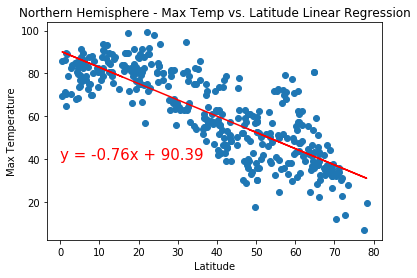

In [45]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.4752290316014145


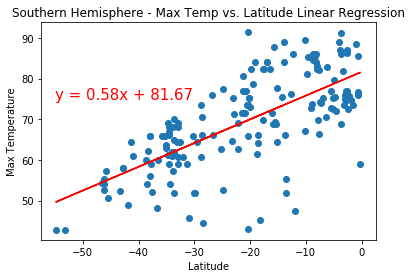

In [46]:
## Convert to floats and store Latitude and Max Temp as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Max Temperature'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# The plots above show that:
# - in the northern hemisphere, latitude and max temp is negatively correlated--
#   as move up from the equator to the north pole, the temperature goes down.
# - in the southern hemisphere, latitude and max temp is positively correlated--
#   as you move up from the south pole to the equator, the temperature goes up.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 1.798265042506935e-07


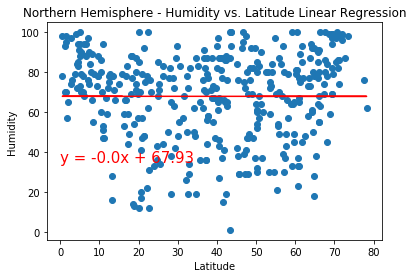

In [47]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,35),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.07741683179327183


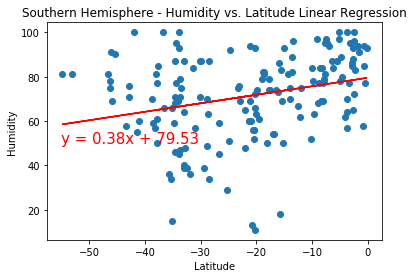

In [48]:
## Convert to floats and store Latitude and Humidity as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,50),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Humidity vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# The plots above show that latitude has no correlation to humidity in the northern hemisphere and 
# a low correlation in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.015584228838128319


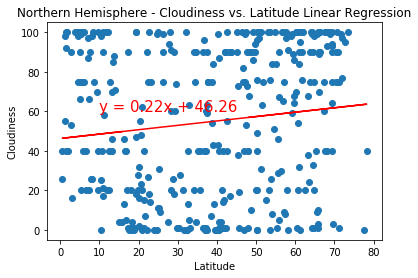

In [49]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,60),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.016406101210918678


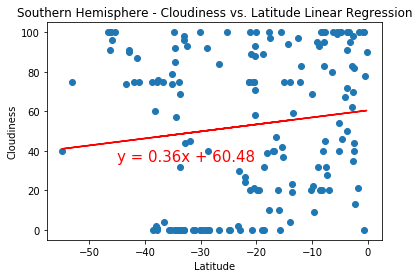

In [50]:
## Convert to floats and store Latitude and Cloudiness as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,35),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# The plots above show a low correlation between latitude and cloudiness in both hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.044643291350639984


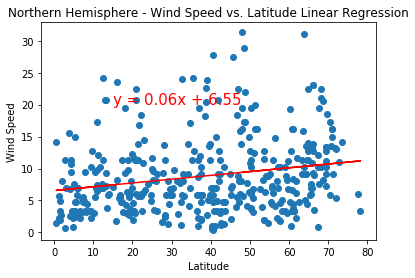

In [51]:
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(15,20),fontsize=15,color="red")

# Label plot
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.008364738463160167


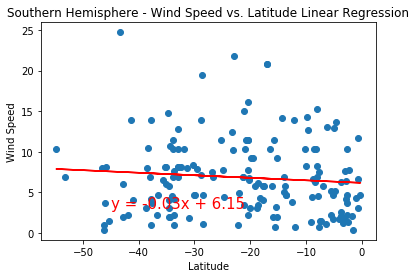

In [52]:
## Convert to floats and store Latitude and Wind Speed as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-45,3),fontsize=15,color="red")

# Label plot
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

In [ ]:
# The plots above show no correlation between latitude and wind speed.